# Dicom file manipulation with the Pydicom Library
https://pydicom.github.io/

## Contents:
* Reading Dicom files (general)
* Changing Dicom tags
* Modifying Dicom images
* Reading Dicom CT image files
* Reading Dicom RT Plan files

###  Architecture of DICOM :
### https://dicom.innolitics.com/ciods

# Reading Dicom files (general)

## Exemple with a Nuclear Medicine imaging (SPECT) Dicom

In [62]:
import pydicom as dcm

# open dicom file (works for all .dcm file)
File = dcm.read_file('data/patient_SPECT.dcm')
print(File)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TOMO', 'EMISSION']
(0008, 0016) SOP Class UID                       UI: Nuclear Medicine Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.6.1.68089.30900111062915055740600000002
(0008, 0020) Study Date                          DA: '20110629'
(0008, 0021) Series Date                         DA: '20110629'
(0008, 0022) Acquisition Date                    DA: '20110629'
(0008, 0023) Content Date                        DA: '20110629'
(0008, 0030) Study Time                          TM: '133104.671000'
(0008, 0031) Series Time                         TM: '170711'
(0008, 0032) Acquisition Time                    TM: '170711.000000'
(0008, 0033) Content Time                        TM: '170711.000000'
(0008, 0050) Accession Number                    SH: '20110629135645'
(0008, 0060) Modality                            

## Acces to Dicom data by sequence name 

In [66]:
print('Image type :',  File.ImageType )
print('Image type first element :', File.ImageType[0])
print('Modality: ',  File.Modality)
print()
# Type of data
# Note that they are all string, so you need a conversion to (float, int...)
print('type of ImageType dicom sequence : ', type(File.ImageType))
print('type of first element of ImageType dicom sequence : ', type(File.ImageType[0]))
print()
pixelSpacing = File.PixelSpacing
print('pixel spacing :', pixelSpacing)
print('length pixel spacing sequence :', len(pixelSpacing))
print('type pixel spacing :', type(pixelSpacing[0]))

Image type : ['ORIGINAL', 'PRIMARY', 'TOMO', 'EMISSION']
Image type first element : ORIGINAL
Modality:  NM

type of ImageType dicom sequence :  <class 'pydicom.multival.MultiValue'>
type of first element of ImageType dicom sequence :  <class 'str'>

pixel spacing : [4.7951998710632, 4.7951998710632]
length pixel spacing sequence : 2
type pixel spacing : <class 'pydicom.valuerep.DSfloat'>


In [67]:
# Search dicom sequence with 'name' chain
print(File.dir('name'))

['InstitutionName', 'ManufacturerModelName', 'OperatorsName', 'PatientName', 'ProtocolName', 'ReferringPhysicianName', 'StationName']


## Acces to Dicom data by tag (hexadecimal)

In [68]:
# print 'Detector Information Sequence' dicom sequence 
print(File[0x054, 0x022])

# print 'Radialposition' First sub sequence of 'Detector Information Sequence' dicom sequence
print(File[0x054, 0x022][0][0x018, 0x1142].value)

(0054, 0022) Detector Information Sequence       SQ: <Sequence, length 2>
[246.19999694824, 244.60000610352, 236.30000305176, 229.19999694824, 221.19999694824, 210.30000305176, 204.5, 204.5, 210.30000305176, 223.60000610352, 244.19999694824, 264.10000610352, 281.30001831055, 295.70001220703, 307.10000610352, 315, 324, 328.60000610352, 331.10000610352, 331.10000610352, 331.10000610352, 331.10000610352, 325.5, 317.5, 305.89999389648, 291, 276.60000610352, 259, 237.10000610352, 216.10000610352, 198, 173.80000305176]


In [69]:
list_0 = File[0x054, 0x022][0][0x018, 0x1142].value
list_1 = File[0x054, 0x022][1][0x018, 0x1142].value
# Note the loop to convert string into float into the 'list' pos_radial_0
pos_radial_0 = [float(val) for val in list_0]
pos_radial_1 = [float(val) for val in list_1]

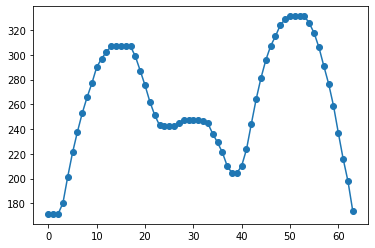

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the positions
plt.plot(pos_radial_1+pos_radial_0, 'o-', label='detecteur 1+2');

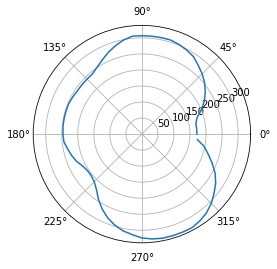

In [71]:
import numpy as np

# this polar plot with the same values describes camera trajectory surronding patient
plt.polar([2*np.pi*l/64 for l in range(64)],pos_radial_1+pos_radial_0);

## Creation of a dictionary on the  Energy Windows (there are 5)

In [72]:
# Looking for dicom sequence
File.dir('energy')

['EnergyWindowInformationSequence',
 'EnergyWindowVector',
 'NumberOfEnergyWindows']

In [73]:
print('There are', len(File.EnergyWindowInformationSequence), 'energy windows:')
print() 
print(File.EnergyWindowInformationSequence)

There are 5 energy windows:

[(0054, 0013)  Energy Window Range Sequence   1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: "228.47500610352"
   (0054, 0015) Energy Window Upper Limit           DS: "265.52499389648"
   ---------
(0054, 0018) Energy Window Name                  SH: '111 Indium'(0054, 0013)  Energy Window Range Sequence   1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: "159.10000610352"
   (0054, 0015) Energy Window Upper Limit           DS: "184.89999389648"
   ---------
(0054, 0018) Energy Window Name                  SH: '111 Indium'(0054, 0013)  Energy Window Range Sequence   1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: "203.77500915527"
   (0054, 0015) Energy Window Upper Limit           DS: "228.47500610352"
   ---------
(0054, 0018) Energy Window Name                  SH: 'Lower Scatter'(0054, 0013)  Energy Window Range Sequence   1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit    

In [74]:
# Example of two way to acces to Sequence Data
print(File.EnergyWindowInformationSequence[0].EnergyWindowRangeSequence[0].EnergyWindowLowerLimit)
print(File.EnergyWindowInformationSequence[0][0x054, 0x013][0][0x054, 0x014].value)

228.47500610352
228.47500610352


In [75]:
#Dictionary creation 
dic_energy={}

# Loop on every energy of EnergyWindowInformationSequence and collect data 
for energy in File.EnergyWindowInformationSequence:
    low=float(energy[0x054, 0x013][0][0x054, 0x014].value)
    high=float(energy[0x054, 0x013][0][0x054, 0x015].value)
    width=high-low
    pic=(high+low)/2
    pic_name=round((high+low)/2, 0)        #round to get int part 
    dic_energy[pic_name]={}
    dic_energy[pic_name]['low']=low
    dic_energy[pic_name]['high']=high
    dic_energy[pic_name]['width']=width
    dic_energy[pic_name]['pic']=pic

dic_energy

{247.0: {'low': 228.47500610352,
  'high': 265.52499389648,
  'width': 37.049987792959996,
  'pic': 247.0},
 172.0: {'low': 159.10000610352,
  'high': 184.89999389648,
  'width': 25.799987792959996,
  'pic': 172.0},
 216.0: {'low': 203.77500915527,
  'high': 228.47500610352,
  'width': 24.699996948250003,
  'pic': 216.125007629395},
 146.0: {'low': 133.30000305176,
  'high': 159.10000610352,
  'width': 25.80000305176,
  'pic': 146.20000457764002},
 192.0: {'low': 184.89999389648,
  'high': 198.66000366211,
  'width': 13.760009765630002,
  'pic': 191.779998779295}}

## Acces to Image pixel map

In [76]:
# Acces to image pixel data 
arr_image = File.pixel_array
print(type(arr_image))
print('Image Dimension : ', File.pixel_array.shape)
print(File.pixel_array.min(), File.pixel_array.max(), File.pixel_array.mean())

<class 'numpy.ndarray'>
Image Dimension :  (320, 128, 128)
0 689 3.4655183792114257


In [77]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

def im_viewer(im,cmap):
    def plot_image(myslice):
        plt.imshow(im[myslice,:,:], cmap=cmap)
    interact(plot_image, myslice=(0, im.shape[0]-1))
    return;

im_viewer(arr_image, plt.cm.hot)

interactive(children=(IntSlider(value=159, description='myslice', max=319), Output()), _dom_classes=('widget-i…

# Modifying Dicom files

## Changing Dicom tags

In [78]:
# Remove patient name
print(File.PatientName)
File.PatientName = 'PythonCourse'
print(File.PatientName)

DQPRM^optionnel
PythonCourse


## Changing the image data

In [79]:
# modify and save
print(File.pixel_array.min(), File.pixel_array.max(), File.pixel_array.mean())
File.pixel_array[File.pixel_array < 100] = 0
print(File.pixel_array.min(), File.pixel_array.max(), File.pixel_array.mean())

# the pixel values are contained in PixelData, pixel_array is an attribute from pydicom
# to store the new pixel values they need to be set as a string to PixelData
File.PixelData = File.pixel_array.tostring()

0 689 3.4655183792114257
0 689 0.49348297119140627


## Saving Dicom file

In [87]:
File.save_as('output/patient_SPECT_modified.dcm')

# Reading Dicom CT image

In [81]:
import numpy as np
import pydicom as dcm
from glob import glob

def read_CT(path):
    # read all .dcm images and put them in a list slices
    slices = [dcm.read_file(file) for file in glob(path + '/*.dcm')]
    # sort the slices
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    # create a numpy matrix containing all slices
    ct = np.stack([s.pixel_array for s in slices], axis=-1)
    # Convert to Hounsfield units (HU)
    ct = ct * slices[0].RescaleSlope + slices[0].RescaleIntercept
    return ct

In [82]:
# subset of anonymized CT dicom sample from https://www.dicomlibrary.com
ct_image = read_CT('data/patient_CT_dcm/')
ct_image.shape

(512, 512, 26)

In [83]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

def im_viewer(im,cmap):
    def plot_image(myslice):
        plt.imshow(im[:,:,myslice], cmap=cmap)
    interact(plot_image, myslice=(0, im.shape[2]-1))
    return;

im_viewer(ct_image, plt.cm.bone)

interactive(children=(IntSlider(value=12, description='myslice', max=25), Output()), _dom_classes=('widget-int…

# Reading DICOM RT plan

#### DICOM input for GATE simulations:
* Beam level
    * Beam Delivery Type
    * Beam Type
    * Beam Radiation Type
    * Beam Energy
    * Beam Fluence Type
    * Direction Gantry Rotation
    * Direction Collimator Rotation
    * Collimator Rotation
    * Isocenter Position
    * Applicator ID (electron beam)
    * Applicator Type (electron beam)
    * Source Surface Distance (electron beam)
* Control Point Index
    * Gantry Angle
    * X Jaws Poistions
    * Y Jaws Positions
    * MLC Positions
    * Dose Rate
    
    


In [84]:
import pydicom as dcm

plan = dcm.read_file("data/patient_RP.dcm")
print(plan)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20191022'
(0008, 0013) Instance Creation Time              TM: '195729.348000'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.5.950586737223.600402.20191022193004
(0008, 0020) Study Date                          DA: '20190219'
(0008, 0030) Study Time                          TM: '154720.437000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'RTPLAN'
(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: 'SRVVARIAN-DB'
(0008, 1030) Study Description                   LO: ''
(0008, 103e) Series Description                  LO: 'Plans ARIA RadOnc'
(0008, 1070) Operators' Name                 

In [85]:
for beam in plan.BeamSequence:
    print('Beam Name: ', beam.BeamName)
    print('Beam Delivery Type: ', beam.BeamType)
    print('Beam Radiation Type: ', beam.RadiationType)
    print('Beam Energy: ', beam.ControlPointSequence[0].NominalBeamEnergy)
    print('Beam Fluence Mode: ', beam.PrimaryFluenceModeSequence[0].FluenceMode)
    
    for control_index in beam.ControlPointSequence:
        print('Control Index: ', control_index.ControlPointIndex)
        print('     *Gantry Angle: ', control_index.GantryAngle)
        print('     *Dose Rate: ', control_index.ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient)
        print('     *MLC: ', control_index.BeamLimitingDevicePositionSequence[0].LeafJawPositions) # bug to fix control index 0 MLC vlaues seem wrong

Beam Name:  Field 1
Beam Delivery Type:  DYNAMIC
Beam Radiation Type:  PHOTON
Beam Energy:  6
Beam Fluence Mode:  NON_STANDARD
Control Index:  0
     *Gantry Angle:  90
     *Dose Rate:  0
     *MLC:  [-27.5, 27.7]
Control Index:  1
     *Gantry Angle:  89.1964285714286
     *Dose Rate:  4.206203e-3
     *MLC:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28.2, 8.0e-1, 7.0e-1, -5.7, -12, -15, -14.5, -17.5, -17, -17, -17, -17, -17.5, -17, -17.2, 7.8, 6.8, 4.2, 6.0e-1, 1.8, -3.1, -2.9, -4.3, 28.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28.2, 3, 6.3, 12.5, 13.3, 15.8, 15.8, 17.5, 17.4, 17.5, 17.5, 16.4, -6.1, -12.3, -6.2, 17, 15.8, 13.6, 13.3, 10.8, 9.4, 5.4, 1.1, 28.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Control Index:  2
     *Gantry Angle:  87.5892857142857
     *Dose Rate:  1.2618609e-2
     *MLC:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28.2, 6.0e-1, -4.5, -9.5, -12, -15, -

## Buid a dictionary with beam parameters

In [86]:
dic_RP = {}
dic_RP['Name'] = plan.PatientName
dic_RP['ID'] = plan.PatientID
dic_RP['Beam'] = {}

for beam in plan.BeamSequence:
    if beam.TreatmentDeliveryType == 'TREATMENT':
        beam_name=beam.BeamName
        dic_RP['Beam'][beam_name] = {}
        dic_RP['Beam'][beam_name]['Type'] = beam.BeamType
        dic_RP['Beam'][beam_name]['RadiationType'] = beam.RadiationType
        dic_RP['Beam'][beam_name]['Energy'] = beam.ControlPointSequence[0].NominalBeamEnergy
        dic_RP['Beam'][beam_name]['ControlPointSequence'] = {}
        dic_RP['Beam'][beam_name]['ControlPointSequence']['GantryAngle'] = round(float(beam.ControlPointSequence[0].GantryAngle), 3)
        dic_RP['Beam'][beam_name]['ControlPointSequence']['DoseRate'] = round(float(beam.ControlPointSequence[0].ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient), 3)
        dic_RP['Beam'][beam_name]['ControlPointSequence']['X jaws'] = [float(val) for val in beam.ControlPointSequence[0].BeamLimitingDevicePositionSequence[0].LeafJawPositions]
        dic_RP['Beam'][beam_name]['ControlPointSequence']['Y jaws'] = [float(val) for val in beam.ControlPointSequence[0].BeamLimitingDevicePositionSequence[1].LeafJawPositions]
        dic_RP['Beam'][beam_name]['ControlPointSequence']['MLC'] = [float(val) for val in beam.ControlPointSequence[0].BeamLimitingDevicePositionSequence[2].LeafJawPositions]
          
dic_RP

{'Name': 'IM20190219',
 'ID': 'IM20190219',
 'Beam': {'Field 1': {'Type': 'DYNAMIC',
   'RadiationType': 'PHOTON',
   'Energy': "6.0",
   'ControlPointSequence': {'GantryAngle': 90.0,
    'DoseRate': 0.0,
    'X jaws': [-27.5, 27.7],
    'Y jaws': [-28.2, 29.3],
    'MLC': [0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     28.2,
     -1.6,
     1.6,
     -2.7,
     -10.9,
     -15.0,
     -16.3,
     -17.5,
     -17.0,
     -17.0,
     -17.0,
     -17.0,
     -17.5,
     -17.5,
     -17.0,
     4.8,
     6.8,
     4.3,
     3.0,
     1.8,
     -2.9,
     -3.2,
     -2.3,
     28.2,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
 